In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
happy2020 = pd.read_csv('data/happiness2020.csv')

In [28]:
happy2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Ladder score predicted,Error
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,6.437565,-0.175591
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,6.534269,-0.145356
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,6.682074,-0.116116
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,6.533234,-0.129424
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,6.759498,-0.097289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,3.556486,0.023184
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,4.256241,0.284981
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,4.446878,0.347866
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,4.130820,0.466598


### Data Clean ###
### EDA -- Exploratory Data Analysis ###

* trends and relations and correlations
* dependent vs independent

Text(0.5, 1.0, 'GDP vs Ladder Score')

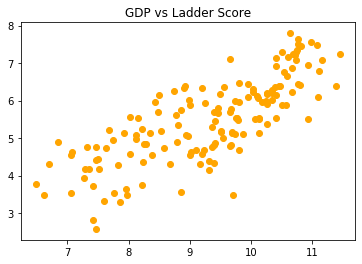

In [29]:
plt.scatter(x = happy2020['Logged GDP per capita'], y = happy2020['Ladder score'], color = 'Orange')
plt.title('GDP vs Ladder Score')

Text(0.5, 1.0, 'Freedom to make life choices vs Ladder Score')

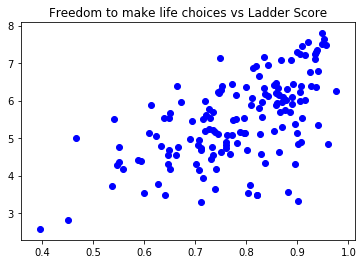

In [30]:
plt.scatter(x = happy2020['Freedom to make life choices'], y = happy2020['Ladder score'], color = 'blue')
plt.title('Freedom to make life choices vs Ladder Score')

Text(0.5, 1.0, 'Social Support vs Ladder Score')

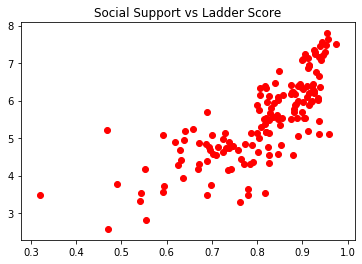

In [31]:
plt.scatter(x = happy2020['Social support'], y = happy2020['Ladder score'], color = 'red')
plt.title('Social Support vs Ladder Score')

Text(0.5, 1.0, 'Healthy Life Expectancy vs Ladder Score')

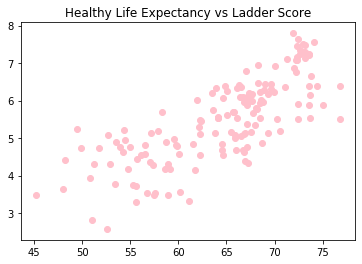

In [32]:
plt.scatter(x = happy2020['Healthy life expectancy'], y = happy2020['Ladder score'], color = 'pink')
plt.title('Healthy Life Expectancy vs Ladder Score')

Text(0.5, 1.0, 'Corruption vs Ladder Score')

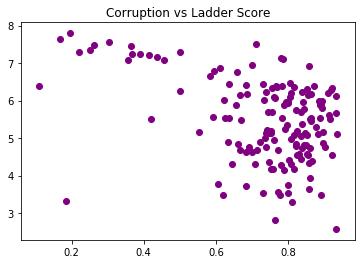

In [33]:
plt.scatter(x = happy2020['Perceptions of corruption'], y = happy2020['Ladder score'], color = 'purple')
plt.title('Corruption vs Ladder Score')

Text(0.5, 1.0, 'GDP vs Corruption')

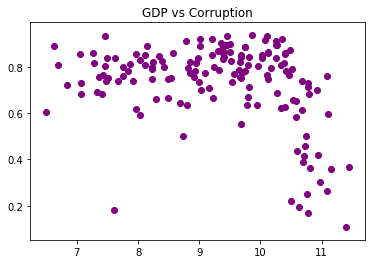

In [34]:
plt.scatter(x = happy2020['Logged GDP per capita'], y = happy2020['Perceptions of corruption'], color = 'purple')
plt.title('GDP vs Corruption')

In [35]:
#GDP, social support, life expectancy
gdp_corr = happy2020['Logged GDP per capita'].corr(happy2020['Ladder score'])
gdp_corr

0.7753744007526836

In [36]:
social_corr = happy2020['Social support'].corr(happy2020['Ladder score'])
social_corr

0.7650007567161378

In [37]:
life_corr = happy2020['Healthy life expectancy'].corr(happy2020['Ladder score'])
life_corr

0.7703162898718492

In [38]:
corruption_corr = happy2020['Perceptions of corruption'].corr(happy2020['Ladder score'])
corruption_corr

-0.41830508725590965

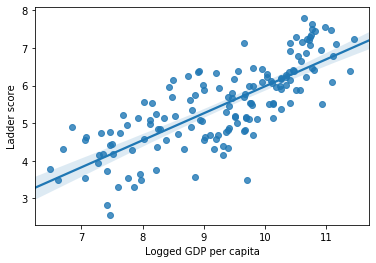

In [39]:
sns.regplot(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

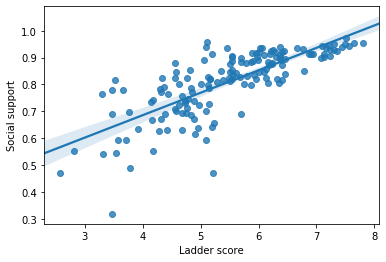

In [40]:
sns.regplot(happy2020['Ladder score'], happy2020['Social support'])

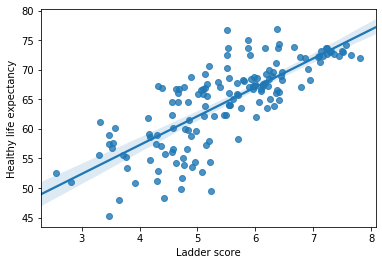

In [41]:
sns.regplot(happy2020['Ladder score'], happy2020['Healthy life expectancy'])

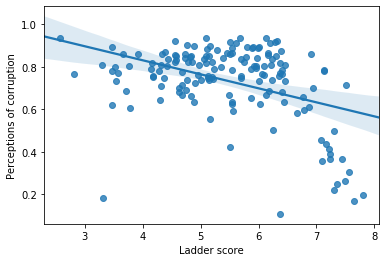

In [42]:
sns.regplot(happy2020['Ladder score'], happy2020['Perceptions of corruption'])

In [43]:
#GDP vs Ladder Score
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(happy2020['Logged GDP per capita'], happy2020['Ladder score'])

In [44]:
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

0.7177384956354942
-1.1986460619042658
0.7753744007526836
5.983050790573552e-32
0.047570849725377506


In [45]:
def regModel(GDP):
    result = slope*GDP + intercept
    return result

In [46]:
happy2020['Ladder score predicted'] = happy2020.apply(lambda r: regModel(r['Logged GDP per capita']), axis = 1)

In [47]:
happy2020[['Ladder score', 'Ladder score predicted']]

,Ladder score,Ladder score predicted
0,7.8087,6.437565
1,7.6456,6.534269
2,7.5599,6.682074
3,7.5045,6.533234
4,7.4880,6.759498
...,...,...
148,3.4759,3.556486
149,3.3123,4.256241
150,3.2992,4.446878
151,2.8166,4.130820


In [48]:
def percentError(r):
    score = r['Ladder score']
    predicted = r['Ladder score predicted']
    error = (predicted - score)/score
    
    return error
    

In [49]:
happy2020['Error'] = happy2020.apply(lambda r: percentError(r), axis = 1)

In [50]:
happy2020[['Ladder score', 'Ladder score predicted', 'Error']].describe()

,Ladder score,Ladder score predicted,Error
count,153.00000,153.000000,153.000000
mean,5.47324,5.473240,0.019348
std,1.11227,0.862426,0.153189
min,2.56690,3.461373,-0.243881
25%,4.72410,4.794933,-0.095513
50%,5.51500,5.588514,-0.004921
75%,6.22850,6.169029,0.095356
max,7.80870,7.019948,0.658990


In [58]:
y = happy2020['Ladder score']
x = happy2020[['Logged GDP per capita', 'Perceptions of corruption']]

In [59]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
reg.predict(x)

array([6.97354989, 7.09339139, 7.07625235, 6.47572363, 7.19369036,
       6.89625554, 6.98978163, 6.85276229, 6.69643185, 7.31611948,
       6.78688675, 6.77796631, 6.67462643, 6.16207106, 5.65289348,
       7.13547797, 6.73922758, 6.59081744, 6.06513243, 6.52306644,
       6.83228735, 6.37796444, 6.4965125 , 5.72212181, 6.45489177,
       6.01567319, 6.52547571, 6.20916611, 5.17068081, 6.09959604,
       7.57169548, 5.61000221, 6.10426268, 5.19309211, 5.19797804,
       5.82789911, 5.96004757, 5.36837989, 5.8416113 , 6.38064416,
       6.08050922, 5.90858804, 6.16776563, 5.45956047, 6.0686206 ,
       5.01794067, 5.78258022, 6.63007337, 5.82910482, 5.9800488 ,
       6.28986206, 5.27252407, 5.92338946, 5.5948276 , 5.69088787,
       4.81901684, 5.98493179, 5.36304903, 5.93331834, 5.10467846,
       6.21437252, 6.41286208, 5.39729459, 5.60309886, 5.07717787,
       4.92048494, 5.42025972, 5.69178348, 5.35149305, 4.9249193 ,
       4.79160334, 5.71860262, 5.87558002, 4.53705535, 5.90455

In [62]:
reg.score(x, y)

0.6295922583301734

In [72]:
x = happy2020[['Logged GDP per capita']]
y = happy2020['Ladder score']

In [73]:
reg = LinearRegression()

In [74]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
reg.score(x,y)

0.6012054613425839

In [78]:
happy2020['Predicted2'] = pd.Series(reg.predict(x))

In [82]:
happy2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Ladder score predicted,Error,Predicted2
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,6.437565,-0.175591,6.437565
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,6.534269,-0.145356,6.534269
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,6.682074,-0.116116,6.682074
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,6.533234,-0.129424,6.533234
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,6.759498,-0.097289,6.759498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,3.556486,0.023184,3.556486
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,4.256241,0.284981,4.256241
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,4.446878,0.347866,4.446878
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,4.130820,0.466598,4.130820


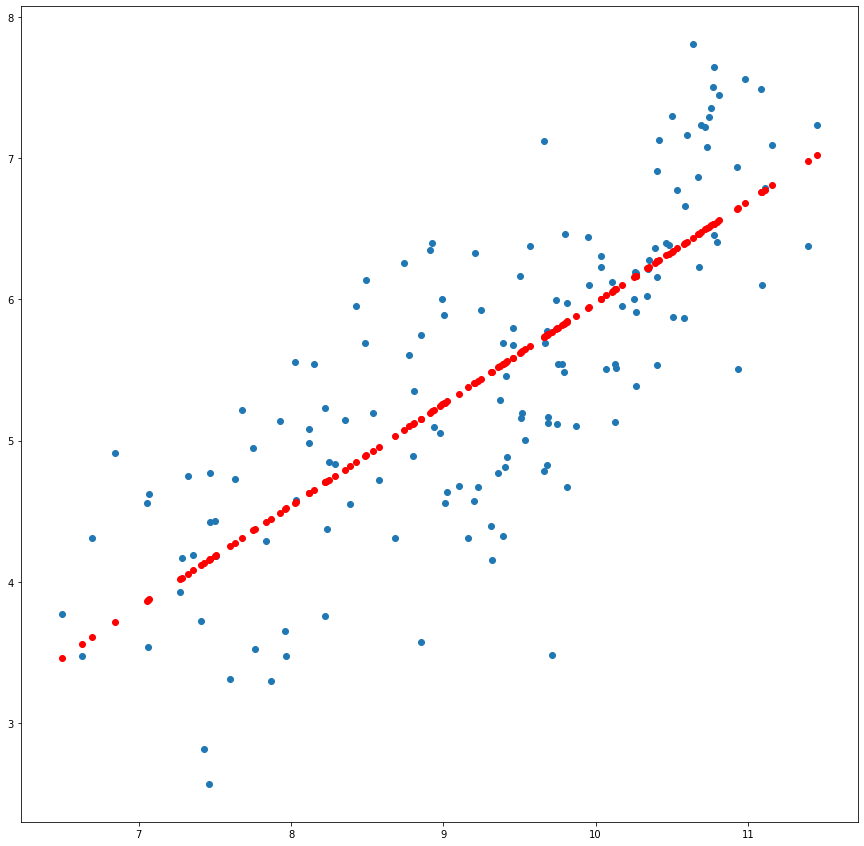

In [96]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(happy2020['Logged GDP per capita'], happy2020['Ladder score'])
ax.scatter(happy2020['Logged GDP per capita'], happy2020['Predicted2'], color = 'red')